## Task 1 - Newtons Method

In [2]:
def sqrt(x):
    # Initial guess for the square root
    z0 = x / 2.0
    
    # Threshold for stopping the iteration
    threshold = 0.01
    
    # Repeat the iteration until the difference is less than the threshold
    while True:
        # Calculate the next guess using Newton's method
        z1 = z0 - (z0 * z0 - x) / (2 * z0)
        
        # Check if the difference is less than the threshold
        if abs(z1 - z0) < threshold:
            break
        
        # Update the guess for the next iteration
        z0 = z1
    
    return z1

# Ask the user for input
user_input = input("Enter a number to find its square root: ")

try:
    # Convert user input to a floating-point number
    x = float(user_input)
    
    # Calculate and print the square root approximation
    result = sqrt(x)
    print(f"The square root of {x} is approximately {result}")

except ValueError:
    print("Invalid input. Please enter a valid number.")


Enter a number to find its square root: 612
The square root of 612.0 is approximately 24.738633802282372


## Task 2 - Chi Squared tests

In [3]:
import scipy.stats as stats

# Given contingency table
observed_data = [[43, 57],
                 [56, 45]]

# Perform chi-squared test
chi2_stat, p_value, dof, expected_data = stats.chi2_contingency(observed_data)

# Print results
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected_data)

Chi-squared Statistic: 2.6359100836554257
P-value: 0.10447218120907394
Degrees of Freedom: 1
Expected Frequencies:
[[49.25373134 50.74626866]
 [49.74626866 51.25373134]]


Given the p-value of 0.1045, you would typically fail to reject the null hypothesis. This means that, based on the data, there is not enough evidence to claim that there is a significant association between drink preference and biscuit in this instance.

## Task 3 - T Tests

In [4]:
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

# Load the penguins dataset from seaborn
penguins = sns.load_dataset('penguins')

# Filter the dataset to include only gentoo penguins
gentoo_penguins = penguins[penguins['species'] == 'Gentoo']

# Separate the data into male and female groups
male_penguins = gentoo_penguins[gentoo_penguins['sex'] == 'Male']['body_mass_g']
female_penguins = gentoo_penguins[gentoo_penguins['sex'] == 'Female']['body_mass_g']

# Perform t-test
t_statistic, p_value = ttest_ind(male_penguins, female_penguins)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is evidence of a significant difference in the body mass of male and female Gentoo penguins.")
else:
    print("There is no significant difference in the body mass of male and female Gentoo penguins.")

T-statistic: 14.721676481405709
P-value: 2.133687602018886e-28
There is evidence of a significant difference in the body mass of male and female Gentoo penguins.


## Task 4  - Iris

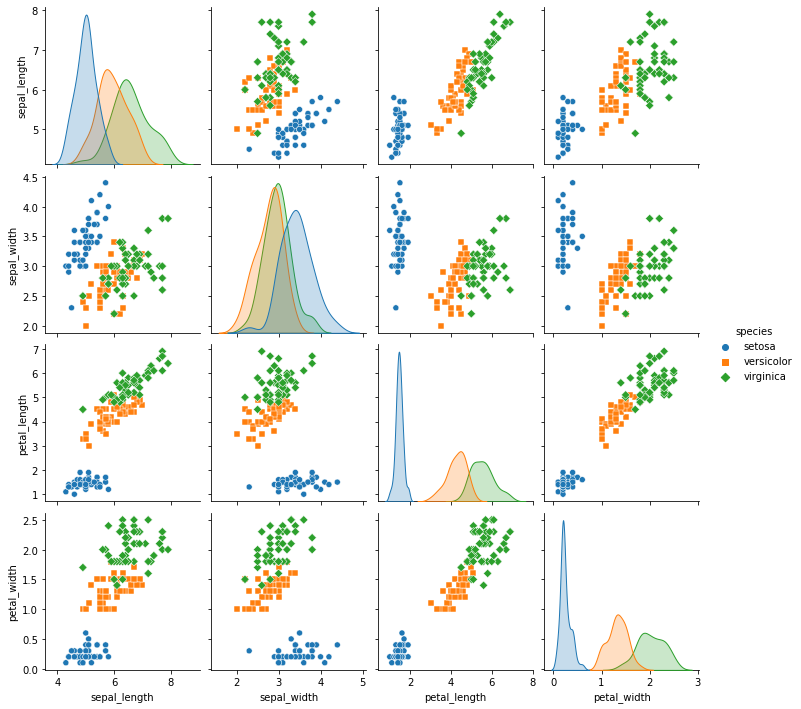

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset from seaborn
iris = sns.load_dataset('iris')

# Create a pair plot
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])

# Show the plot
plt.show()

Looking at the set of plots above you can see that there is a difference between the setosa class and the versicolor and virginica classes. The setosa class, above in blue is usually seperate and easily identifiable, whereas is is not possible to predict if a given iris will belong to the versicolor or virginica class. As seen in the project when a K-NN algorithm is applied to the iris dataset it can accuratetly predict if an iris belongs to the setosa class but for the other 2 classes the accuracy is around 86%

## Task 5 - Principal Component analysis

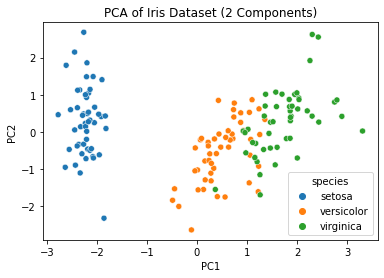

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset('iris')

# Separate features and target variable
X = iris.drop('species', axis=1)
y = iris['species']

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Apply PCA with two components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['species'] = y

# Visualize the results
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pc_df)
plt.title('PCA of Iris Dataset (2 Components)')
plt.show()


PCA is primarily used for reducing the dimensionality of a dataset while retaining as much of the original variability as possible. It accomplishes this by transforming the original features into a new set of uncorrelated variables, called principal components. These components are ordered by the amount of variance they explain, allowing for the selection of a reduced number of components that capture the most significant information in the data. 
    Reducing the data to two or three principal components enables the creation of scatter plots or other visualizations that help reveal patterns, clusters, or relationships among data points.
    By focusing on the principal components that capture the most variance in the data, PCA can help reduce the impact of noise or irrelevant features, leading to a more robust representation of the underlying patterns in the data.

We have reduced the number of dimensions to 2. Reducing the number of dimensions to 2 using  Principal Component Analysis (PCA) is often done for visualization purposes and to simplify the interpretation of complex datasets.

The scatter plot allows us to visually inspect how well the data points of different species are separated in the reduced-dimensional space. This can give insights into the inherent structure of the data. If different species are well-separated, it indicates that the PCA has successfully captured the variation that distinguishes the species. If there is overlap, it suggests that the separation is not as clear in the reduced-dimensional space. As we can see again, between versicolor and virginica there is an overlap, these 2 classes are hard to seperate. Setosa is much more easy to identify. 